In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\idrus\bootup\BootUP-DS-ML\Datasets\Bank_churn_modelling.csv")
df.shape

(10000, 14)

### 2. Data Exploration

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### 3. Data Cleaning

In [8]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# check for duplicated
df.duplicated().sum()

0

In [10]:
# drop unwanted rows
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [11]:
# check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

### 4. Feature Engineering

#### Feature Section

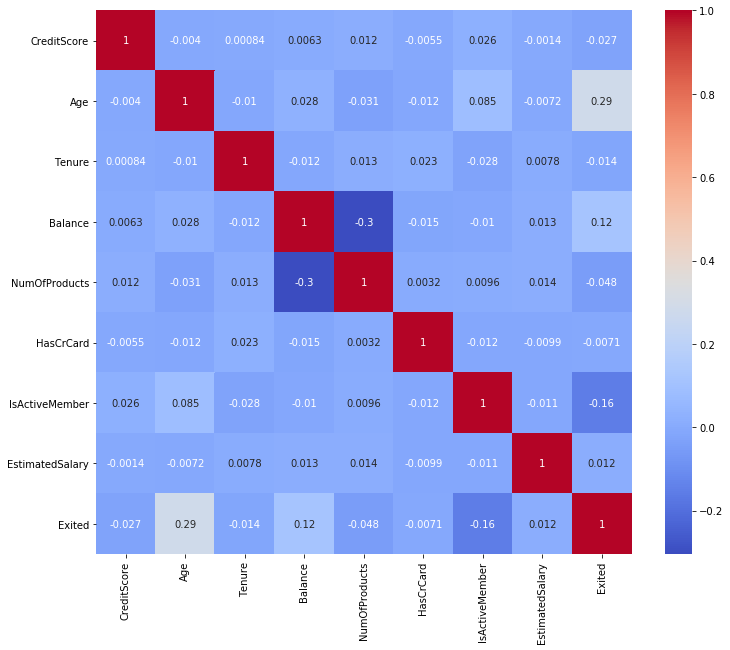

In [12]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

##### ANOVA - analysis of variance - F Test
    - it is used to compare the distributin of a variable in two or more groups
    - for example - comparing distribution of age of customers for groups exited = 1 & exited = 0
    
- Ho = Null Hypothesis = distribution of variable in two/more groups is uniform
- Ha = Alternate Hypothesis = distribution of the variable in two/more groups is not uniform

We always analyse the pvalue, consider for 95% confidence interval, signifcance = 5% = 0.05

    - if pvalue >0.05 = accept the Null hypothesis - feature is not important
    - if pvalue <0.05 = reject the Null hypothesis - feature is important

In [13]:
numerics = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
xnum = df[numerics]
y = df['Exited']
from sklearn.feature_selection import f_classif
fval,pval = f_classif(xnum,y)
for i in range(len(numerics)):print(numerics[i],pval[i])

CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


###### Chi Square Test
    - Used to compare the distribution of categories of a categorical feature in two or more groups
    - in nutshell to compare whether a categorical attribute has some relationship with the other categorical attribute

- H0 = Null Hypothesis = the categorical attribute has uniform distribution in two or more groups
- Ha = Alternative Hypothesis = the categorical attribute has some relationship with the other categorical attribute

We always analyse the pvalue, consider 95% as confidence interval, significance level = 5% i.e.0.05
    - if pvalue > 0.05 = accept the Null Hypothesis - feature is not important
    - if pvalue < 0.05 = reject the Null Hypothesis - feature is important

In [14]:
categories = ['Geography','Gender','HasCrCard','IsActiveMember']
xcat= df[categories]
y = df['Exited']
from sklearn.preprocessing import LabelEncoder
xcat['Geography'] = LabelEncoder().fit_transform(xcat['Geography'])
xcat['Gender'] = LabelEncoder().fit_transform(xcat['Gender'])
from sklearn.feature_selection import chi2
chival,pval = chi2(xcat,y)
for i in range(len(categories)):print(categories[i],pval[i])

Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.5680362405434552e-27


C:\Users\idrus\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\idrus\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [16]:
# selecting important features
x = df[['CreditScore','Geography','Gender','Age','Balance','NumOfProducts','IsActiveMember']]
y = df['Exited']
print(x.shape)
print(y.shape)

(10000, 7)
(10000,)


### 5. Preprocessing

In [17]:
x.head(10)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1
5,645,Spain,Male,44,113755.78,2,0
6,822,France,Male,50,0.00,2,1
7,376,Germany,Female,29,115046.74,4,0
8,501,France,Male,44,142051.07,2,1
9,684,France,Male,27,134603.88,1,1


In [18]:
# onehot encoding for features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# [1,2] column numbers which we want to do preprocess. in this case Geography and Gender

preprocessor = ColumnTransformer([("ohe",OneHotEncoder(drop='first'),[1,2]),("sc",StandardScaler(),[0,3,4,5])],remainder='passthrough')

In [19]:
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new).head(10)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,-0.326221,0.293517,-1.225848,-0.911583,1.0
1,0.0,1.0,0.0,-0.440036,0.198164,0.117350,-0.911583,1.0
2,0.0,0.0,0.0,-1.536794,0.293517,1.333053,2.527057,0.0
3,0.0,0.0,0.0,0.501521,0.007457,-1.225848,0.807737,0.0
4,0.0,1.0,0.0,2.063884,0.388871,0.785728,-0.911583,1.0
5,0.0,1.0,1.0,-0.057205,0.484225,0.597329,0.807737,0.0
6,0.0,0.0,1.0,1.774174,1.056346,-1.225848,0.807737,1.0
7,1.0,0.0,0.0,-2.840488,-0.946079,0.618019,4.246377,0.0
8,0.0,0.0,1.0,-1.547141,0.484225,1.050820,0.807737,1.0
9,0.0,0.0,1.0,0.346319,-1.136786,0.931463,-0.911583,1.0


In [20]:
# train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_new,y,test_size=0.2,random_state=5)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8000, 8)
(2000, 8)
(8000,)
(2000,)


## 6. Apply machine learning algorithm  - Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# train the model using train data
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 7. Performance Analysis

In [22]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember'],
      dtype='object')

In [23]:
new_customer = [[650, "Germany","Male",45,456782,3,1]]
new_customer = preprocessor.transform(new_customer)
model.predict(new_customer)

array([0], dtype=int64)

In [24]:
model.predict_proba(new_customer)

array([[0.67270803, 0.32729197]])

In [25]:
# check the accuracy of the model
ypred = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.8095

In [26]:
# check for recall
# recall is the relevant accuracy to business objective
from sklearn import metrics
metrics.recall_score(ytest,ypred)

# it's only 5 percent contribute to business which is pretty bad
# it because features dont have good linear relationship

0.19012345679012346